# Balanced Random Forest Classification Machine Learning Model for HMDA Data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
#import machine learning dependencies
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [6]:
path = Path('./data/numeric_database.csv')
df = pd.read_csv(path, low_memory=False)

In [7]:
def fix_target_column(member):
    if member == 1:
        return 0
    else: 
        return 1


In [8]:
df['action_taken'] = df['action_taken'].apply(fix_target_column)

In [9]:
df['action_taken'].value_counts()

0    828891
1    680132
Name: action_taken, dtype: int64

In [10]:
X = df.copy()
X = X.drop(columns=['action_taken','sequence_number'], axis=1)
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509023 entries, 0 to 1509022
Data columns (total 21 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   population                      1509023 non-null  float64
 1   minority_population             1509023 non-null  float64
 2   hud_median_family_income        1509023 non-null  float64
 3   tract_to_msamd_income           1509023 non-null  float64
 4   number_of_owner_occupied_units  1509023 non-null  float64
 5   number_of_1_to_4_family_units   1509023 non-null  float64
 6   applicant_sex                   1509023 non-null  int64  
 7   co_applicant_sex                1509023 non-null  int64  
 8   applicant_ethnicity             1509023 non-null  int64  
 9   co_applicant_ethnicity          1509023 non-null  int64  
 10  applicant_race_1                1509023 non-null  int64  
 11  co_applicant_race_1             1509023 non-null  int64  
 12  

In [11]:
for column in X.columns:
    print(column)

population
minority_population
hud_median_family_income
tract_to_msamd_income
number_of_owner_occupied_units
number_of_1_to_4_family_units
applicant_sex
co_applicant_sex
applicant_ethnicity
co_applicant_ethnicity
applicant_race_1
co_applicant_race_1
loan_amount_000s
applicant_income_000s
loan_type
loan_purpose
purchaser_type
property_type
owner_occupancy
hoepa_status
county_code


In [12]:
y = df['action_taken'].ravel()

In [13]:
#scale data
scaler = StandardScaler()
X_scaler = scaler.fit(X)
X_scaled_df = X_scaler.transform(X)

In [14]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, random_state=3, stratify=y)

In [15]:
# balanced random forest classifier 
brfc = BalancedRandomForestClassifier()
brfc.fit(X_train, y_train)
y_pred = brfc.predict(X_test)

In [16]:
print(f'Balanced Accuracy Score: Balanced Random Forest Classifier')
print(balanced_accuracy_score(y_test, y_pred))

Balanced Accuracy Score: Balanced Random Forest Classifier
0.8258400146078364


In [17]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
print(f'Confusion Matrix: Balanced Random Forest Classifier')
cm_df.head()

Confusion Matrix: Balanced Random Forest Classifier


,Predicted 0,Predicted 1
Actual 0,167845,39378
Actual 1,26915,143118


In [30]:
print(f'Imbalanced Classification Report: Balanced Random Forest Classifier')
print(classification_report_imbalanced(y_test,y_pred))

Imbalanced Classification Report: Balanced Random Forest Classifier
                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.81      0.84      0.84      0.83      0.68    207223
          1       0.78      0.84      0.81      0.81      0.83      0.68    170033

avg / total       0.83      0.82      0.83      0.82      0.83      0.68    377256



In [19]:
importances = brfc.feature_importances_
print('BRFC Column Importances')
zipped_importances = sorted(zip(importances, X.columns), reverse=True)
zipped_importances

BRFC Column Importances


[(0.40260422929855727, 'purchaser_type'),
 (0.10129756207001674, 'loan_amount_000s'),
 (0.09665227096891184, 'applicant_income_000s'),
 (0.04983483685749442, 'tract_to_msamd_income'),
 (0.04858294111030901, 'minority_population'),
 (0.046277131079702404, 'population'),
 (0.04591758044887133, 'number_of_owner_occupied_units'),
 (0.0458560227253998, 'number_of_1_to_4_family_units'),
 (0.023037301855423093, 'applicant_race_1'),
 (0.020549993465983487, 'applicant_sex'),
 (0.020450441931952237, 'applicant_ethnicity'),
 (0.020394771790431015, 'hud_median_family_income'),
 (0.01969119184983995, 'county_code'),
 (0.01668059206303869, 'loan_purpose'),
 (0.009224715221855646, 'co_applicant_race_1'),
 (0.009155051926800033, 'loan_type'),
 (0.008175404148010797, 'co_applicant_sex'),
 (0.007266690630347026, 'co_applicant_ethnicity'),
 (0.005771043751255659, 'owner_occupancy'),
 (0.002376324993746971, 'property_type'),
 (0.0002039018120525176, 'hoepa_status')]

In [20]:
importance_df = pd.DataFrame({'importance':[i[0] for i in zipped_importances], 'parameter':[i[1] for i in zipped_importances]})
importance_df.head()

,importance,parameter
0,0.402604,purchaser_type
1,0.101298,loan_amount_000s
2,0.096652,applicant_income_000s
3,0.049835,tract_to_msamd_income
4,0.048583,minority_population


In [21]:
print(importance_df)

    importance                       parameter
0     0.402604                  purchaser_type
1     0.101298                loan_amount_000s
2     0.096652           applicant_income_000s
3     0.049835           tract_to_msamd_income
4     0.048583             minority_population
5     0.046277                      population
6     0.045918  number_of_owner_occupied_units
7     0.045856   number_of_1_to_4_family_units
8     0.023037                applicant_race_1
9     0.020550                   applicant_sex
10    0.020450             applicant_ethnicity
11    0.020395        hud_median_family_income
12    0.019691                     county_code
13    0.016681                    loan_purpose
14    0.009225             co_applicant_race_1
15    0.009155                       loan_type
16    0.008175                co_applicant_sex
17    0.007267          co_applicant_ethnicity
18    0.005771                 owner_occupancy
19    0.002376                   property_type
20    0.00020

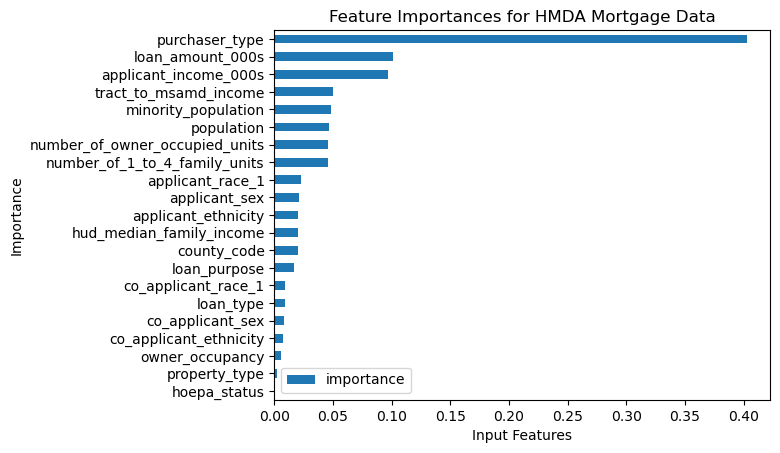

<Figure size 640x480 with 0 Axes>

In [61]:
importance_df.plot.barh('parameter', y='importance')
plt.title('Feature Importances for HMDA Mortgage Data')
plt.xlabel('Input Features')
plt.ylabel('Importance')
plt.gca().invert_yaxis()
plt.figure(facecolor='#599191')
plt.savefig('./eda/feature_importances.png', bbox_inches='tight')
plt.show()

In [36]:
#X_NH = X NO HOEPA STATUS
X_NH = X.copy()
X_NH = X_NH.drop(columns='hoepa_status', axis=1)

In [45]:
X_train_NH, X_test_NH, y_train_NH, y_test_NH = train_test_split(X_NH, y, random_state=3, stratify=y)

In [46]:
brfc.fit(X_train_NH, y_train_NH)
y_pred_NH = brfc.predict(X_test_NH)

In [47]:
print(f'Balanced Accuracy Score: Balanced Random Forest Classifier - NO HOEPA STATUS')
print(balanced_accuracy_score(y_test_NH, y_pred_NH))

Balanced Accuracy Score: Balanced Random Forest Classifier - NO HOEPA STATUS
0.8260998519680105


In [50]:
cm_NH = confusion_matrix(y_test_NH, y_pred_NH)
cm_df_NH = pd.DataFrame(cm_NH, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])
print(f'Confusion Matrix: Balanced Random Forest Classifier - NO HOEPA STATUS')
cm_df_NH.head()

Confusion Matrix: Balanced Random Forest Classifier - NO HOEPA STATUS


,Predicted 0,Predicted 1
Actual 0,167999,39224
Actual 1,26953,143080


In [49]:
print(f'Imbalanced Classification Report: Balanced Random Forest Classifier - NO HOEPA STATUS')
print(classification_report_imbalanced(y_test_NH,y_pred_NH))

Imbalanced Classification Report: Balanced Random Forest Classifier - NO HOEPA STATUS
                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      0.81      0.84      0.84      0.83      0.68    207223
          1       0.78      0.84      0.81      0.81      0.83      0.68    170033

avg / total       0.83      0.82      0.83      0.82      0.83      0.68    377256

